### The below script performs differential binding analysis of ATAC-seq peak data using the DiffBind R package. The script maily follows the tutorial provided by the package authors.

In [1]:
# check R version 
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

In [5]:
library(DiffBind)

In [7]:
# check the version of the installed DiffBind package 
packageVersion("DiffBind")

[1] ‘3.0.15’

In [8]:
# read in the data table including the paths to the bam files and peaks
flowDataInfo =read.csv("/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/BMP9_FSS_peakSet.csv",
                          sep = ";") #, header=TRUE,row.names=NULL
flowDataInfo

SampleID,Tissue,Condition,Treatment,bamReads,Replicate,ControlID,Peaks,PeakCaller
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
flow-cont_s1,HUAEC,flow_cont,cont,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/flow_control_s1_s2/atac/017b000c-cac4-42fd-8f58-2a66431d57d7/call-filter_no_dedup/shard-0/execution/mpimg_L23760-1_LR2107-1_S1_R1_001.trim.srt.filt.no_chrM_MT.bam,1,flow_cont,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/flow_control_s1_s2/atac/017b000c-cac4-42fd-8f58-2a66431d57d7/call-call_peak/shard-0/execution/mpimg_L23760-1_LR2107-1_S1_R1_001.trim.srt.nodup.no_chrM_MT.tn5.pval0.01.300K.bfilt.narrowPeak.gz,bed
flow-cont_s2,HUAEC,flow_cont,cont,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/flow_control_s1_s2/atac/017b000c-cac4-42fd-8f58-2a66431d57d7/call-filter_no_dedup/shard-1/execution/mpimg_L23761-1_LR2107-2_S2_R1_001.trim.srt.filt.no_chrM_MT.bam,2,flow_cont,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/flow_control_s1_s2/atac/017b000c-cac4-42fd-8f58-2a66431d57d7/call-call_peak/shard-1/execution/mpimg_L23761-1_LR2107-2_S2_R1_001.trim.srt.nodup.no_chrM_MT.tn5.pval0.01.300K.bfilt.narrowPeak.gz,bed
flow-bmp9_s3,HUAEC,flow_bmp9,bmp9,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/flow_bmp9_s3_s4/atac/345f4ae2-e7ed-408a-b1e5-a12cc1641696/call-filter_no_dedup/shard-0/execution/mpimg_L23762-1_LR2107-3_S3_R1_001.trim.srt.filt.no_chrM_MT.bam,1,flow_bmp9,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/flow_bmp9_s3_s4/atac/345f4ae2-e7ed-408a-b1e5-a12cc1641696/call-call_peak/shard-0/execution/mpimg_L23762-1_LR2107-3_S3_R1_001.trim.srt.nodup.no_chrM_MT.tn5.pval0.01.300K.bfilt.narrowPeak.gz,bed
flow-bmp9_s4,HUAEC,flow_bmp9,bmp9,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/flow_bmp9_s3_s4/atac/345f4ae2-e7ed-408a-b1e5-a12cc1641696/call-filter_no_dedup/shard-1/execution/mpimg_L23763-1_LR2107-4_S4_R1_001.trim.srt.filt.no_chrM_MT.bam,2,flow_bmp9,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/flow_bmp9_s3_s4/atac/345f4ae2-e7ed-408a-b1e5-a12cc1641696/call-call_peak/shard-1/execution/mpimg_L23763-1_LR2107-4_S4_R1_001.trim.srt.nodup.no_chrM_MT.tn5.pval0.01.300K.bfilt.narrowPeak.gz,bed
stat-cont_s5,HUAEC,stat_cont,cont,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/static_control_s5_s6/atac/9ecd9d8b-7719-49f3-8272-1d9d642b7feb/call-filter_no_dedup/shard-0/execution/mpimg_L23764-1_LR2107-5_S5_R1_001.trim.srt.filt.no_chrM_MT.bam,1,stat_cont,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/static_control_s5_s6/atac/9ecd9d8b-7719-49f3-8272-1d9d642b7feb/call-call_peak/shard-0/execution/mpimg_L23764-1_LR2107-5_S5_R1_001.trim.srt.nodup.no_chrM_MT.tn5.pval0.01.300K.bfilt.narrowPeak.gz,bed
stat-cont_s6,HUAEC,stat_cont,cont,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/static_control_s5_s6/atac/9ecd9d8b-7719-49f3-8272-1d9d642b7feb/call-filter_no_dedup/shard-1/execution/mpimg_L23765-1_LR2107-6_S6_R1_001.trim.srt.filt.no_chrM_MT.bam,2,stat_cont,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/static_control_s5_s6/atac/9ecd9d8b-7719-49f3-8272-1d9d642b7feb/call-call_peak/shard-1/execution/mpimg_L23765-1_LR2107-6_S6_R1_001.trim.srt.nodup.no_chrM_MT.tn5.pval0.01.300K.bfilt.narrowPeak.gz,bed
stat-bmp9_s7,HUAEC,stat_bmp9,bmp9,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/static_bmp9_s7_s8/atac/fd59a6eb-de41-4300-8d2b-40e4b36da191/call-filter_no_dedup/shard-0/execution/mpimg_L23766-1_LR2107-7_S7_R1_001.trim.srt.filt.no_chrM_MT.bam,1,stat_bmp9,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/static_bmp9_s7_s8/atac/fd59a6eb-de41-4300-8d2b-40e4b36da191/call-call_peak/shard-0/execution/mpimg_L23766-1_LR2107-7_S7_R1_001.trim.srt.nodup.no_chrM_MT.tn5.pval0.01.300K.bfilt.narrowPeak.gz,bed
stat-bmp9_s8,HUAEC,stat_bmp9,bmp9,/project/Mechanogenomics_data/ATACseq_ENCODE_PIPELINE/static_bmp9_s7_s8/atac/fd59a6eb-de41-4300-8d2b-40e4b36da191/call-filter_no_dedup/shard-1/execution/mpimg_L23767-1_LR2107-8_S8_R1_001.trim.srt.filt.no_chrM_MT.bam,2,stat_bmp9,/project/Mechanog

#### read in the peaksets:

In [9]:
flow_DBdata <- dba(sampleSheet=flowDataInfo) 

flow-cont_s1 HUAEC  flow_cont cont 1 bed

flow-cont_s2 HUAEC  flow_cont cont 2 bed

flow-bmp9_s3 HUAEC  flow_bmp9 bmp9 1 bed

flow-bmp9_s4 HUAEC  flow_bmp9 bmp9 2 bed

stat-cont_s5 HUAEC  stat_cont cont 1 bed

stat-cont_s6 HUAEC  stat_cont cont 2 bed

stat-bmp9_s7 HUAEC  stat_bmp9 bmp9 1 bed

stat-bmp9_s8 HUAEC  stat_bmp9 bmp9 2 bed



#### count the reads: calculate a binding matrix with scores based on read counts for every sample

In [10]:
flow <- dba.count(flow_DBdata)

Computing summits...

Re-centering peaks...

Reads will be counted as Paired-end.



In [11]:
flow

8 Samples, 219348 sites in matrix:
            ID Tissue Condition Treatment Replicate     Reads FRiP
1 flow-cont_s1  HUAEC flow_cont      cont         1 161898862 0.33
2 flow-cont_s2  HUAEC flow_cont      cont         2  39801064 0.21
3 flow-bmp9_s3  HUAEC flow_bmp9      bmp9         1  49374386 0.26
4 flow-bmp9_s4  HUAEC flow_bmp9      bmp9         2 140609722 0.36
5 stat-cont_s5  HUAEC stat_cont      cont         1 150831078 0.38
6 stat-cont_s6  HUAEC stat_cont      cont         2  49582066 0.46
7 stat-bmp9_s7  HUAEC stat_bmp9      bmp9         1  68002379 0.50
8 stat-bmp9_s8  HUAEC stat_bmp9      bmp9         2 186855018 0.50

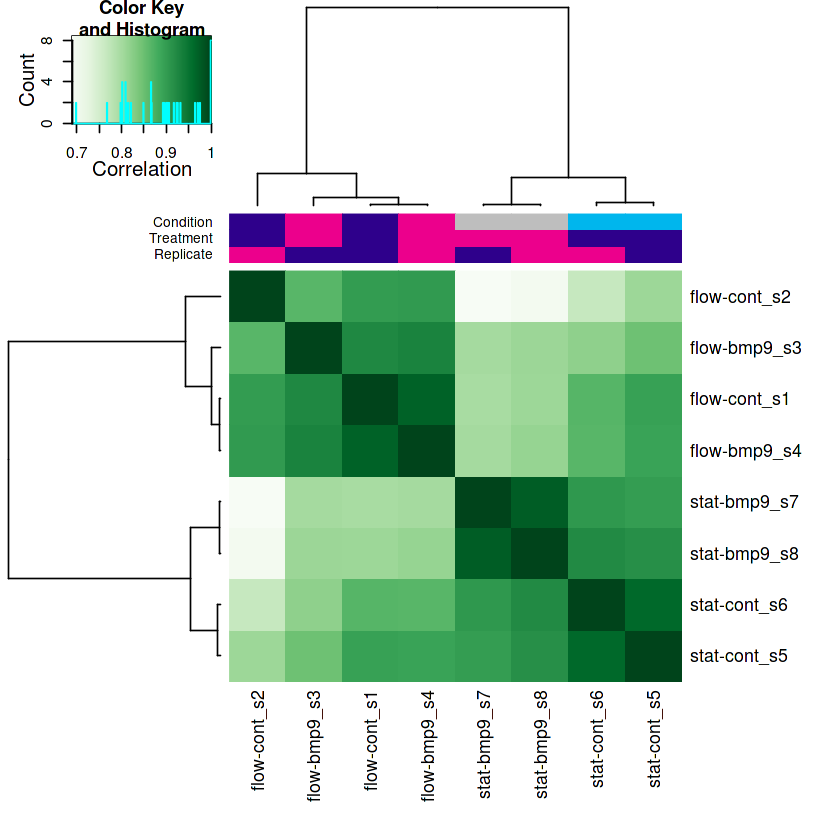

In [12]:
plot(flow)

### calculate the library size for each experiment

In [13]:
# the smaples uses the consenssu peak set
# FRiP stands for Fraction of Reads in Peaks
dba.show(flow)

,ID,Tissue,Condition,Treatment,Replicate,Caller,Intervals,Reads,FRiP
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,flow-cont_s1,HUAEC,flow_cont,cont,1,counts,219348,161898862,0.33
2,flow-cont_s2,HUAEC,flow_cont,cont,2,counts,219348,39801064,0.21
3,flow-bmp9_s3,HUAEC,flow_bmp9,bmp9,1,counts,219348,49374386,0.26
4,flow-bmp9_s4,HUAEC,flow_bmp9,bmp9,2,counts,219348,140609722,0.36
5,stat-cont_s5,HUAEC,stat_cont,cont,1,counts,219348,150831078,0.38
6,stat-cont_s6,HUAEC,stat_cont,cont,2,counts,219348,49582066,0.46
7,stat-bmp9_s7,HUAEC,stat_bmp9,bmp9,1,counts,219348,68002379,0.50
8,stat-bmp9_s8,HUAEC,stat_bmp9,bmp9,2,counts,219348,186855018,0.50


In [14]:
info <- dba.show(flow)
libsizes <- cbind(LibReads=info$Reads, FRiP=info$FRiP,PeakReads=round(info$Reads * info$FRiP))
rownames(libsizes) <- info$ID
libsizes

,LibReads,FRiP,PeakReads
flow-cont_s1,161898862,0.33,53426624
flow-cont_s2,39801064,0.21,8358223
flow-bmp9_s3,49374386,0.26,12837340
flow-bmp9_s4,140609722,0.36,50619500
stat-cont_s5,150831078,0.38,57315810
stat-cont_s6,49582066,0.46,22807750
stat-bmp9_s7,68002379,0.50,34001190
stat-bmp9_s8,186855018,0.50,93427509


#### Normalize the data. By default, the data are normalized based on sequencing depth.

In [17]:
norm <- dba.normalize(flow, bRetrieve=TRUE)
normlibs <- cbind(FullLibSize=norm$lib.sizes, NormFacs=norm$norm.factors, NormLibSize=round(norm$lib.sizes/norm$norm.factors))
rownames(normlibs) <- info$ID
normlibs

,FullLibSize,NormFacs,NormLibSize
flow-cont_s1,161898862,1.5292330,105869322
flow-cont_s2,39801064,0.3759452,105869322
flow-bmp9_s3,49374386,0.4663710,105869322
flow-bmp9_s4,140609722,1.3281442,105869322
stat-cont_s5,150831078,1.4246911,105869322
stat-cont_s6,49582066,0.4683327,105869322
stat-bmp9_s7,68002379,0.6423237,105869322
stat-bmp9_s8,186855018,1.7649591,105869322


In [18]:
flow <- dba.normalize(flow)

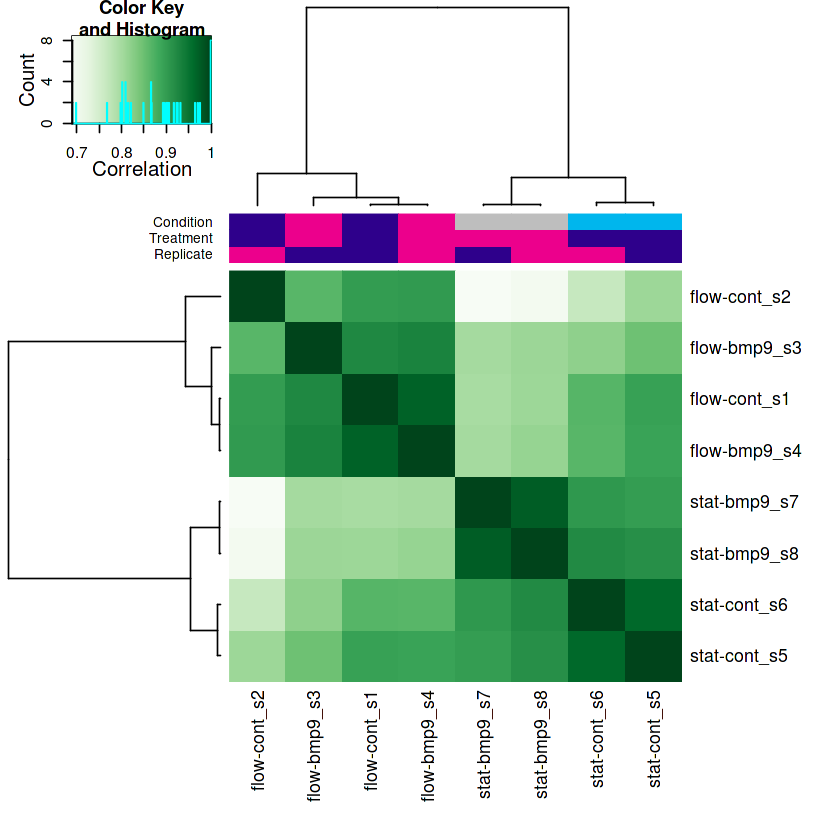

In [19]:
plot(flow)

#### visualize the relationship between samples

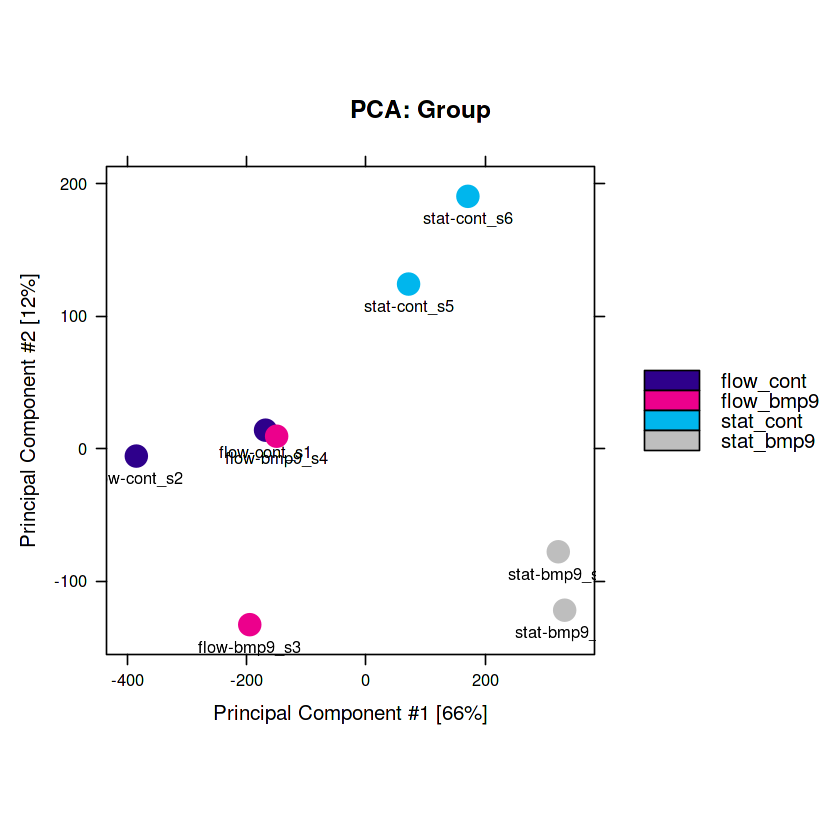

In [20]:
dba.plotPCA(flow,  attributes=DBA_CONTROL, label=DBA_ID)

#### Model the data. Here we are contrasting the data by the conditions, that is, by different conditions. 

In [21]:
flow <- dba.contrast(flow, categories=DBA_CONDITION,minMembers = 2)

Computing results names...



In [22]:
flow

8 Samples, 219348 sites in matrix:
            ID Tissue Condition Treatment Replicate     Reads FRiP
1 flow-cont_s1  HUAEC flow_cont      cont         1 161898862 0.33
2 flow-cont_s2  HUAEC flow_cont      cont         2  39801064 0.21
3 flow-bmp9_s3  HUAEC flow_bmp9      bmp9         1  49374386 0.26
4 flow-bmp9_s4  HUAEC flow_bmp9      bmp9         2 140609722 0.36
5 stat-cont_s5  HUAEC stat_cont      cont         1 150831078 0.38
6 stat-cont_s6  HUAEC stat_cont      cont         2  49582066 0.46
7 stat-bmp9_s7  HUAEC stat_bmp9      bmp9         1  68002379 0.50
8 stat-bmp9_s8  HUAEC stat_bmp9      bmp9         2 186855018 0.50

Design: [~Condition] | 6 Contrasts:
     Factor     Group Samples    Group2 Samples2
1 Condition flow_cont       2 flow_bmp9        2
2 Condition flow_cont       2 stat_cont        2
3 Condition flow_cont       2 stat_bmp9        2
4 Condition flow_bmp9       2 stat_cont        2
5 Condition flow_bmp9       2 stat_bmp9        2
6 Condition stat_bmp9       2 s

#### below we perform differnetial analysis. As per default, the algorithm employs DESeq2 in the abckground. FDR  cutoff is set to <= 0.05.

In [23]:
flow <- dba.analyze(flow)

Applying Blacklist/Greylists...

Genome detected: Hsapiens.UCSC.hg38

Applying blacklist...

Removed: 5 of 219348 intervals.

Re-normalizing...

Removed 5 (of 219348) consensus peaks.

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [24]:
dba.show(flow, bContrasts=TRUE)

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,flow_cont,2,flow_bmp9,2,1
2,Condition,flow_cont,2,stat_cont,2,56396
3,Condition,flow_cont,2,stat_bmp9,2,126468
4,Condition,flow_bmp9,2,stat_cont,2,38186
5,Condition,flow_bmp9,2,stat_bmp9,2,101682
6,Condition,stat_bmp9,2,stat_cont,2,29705


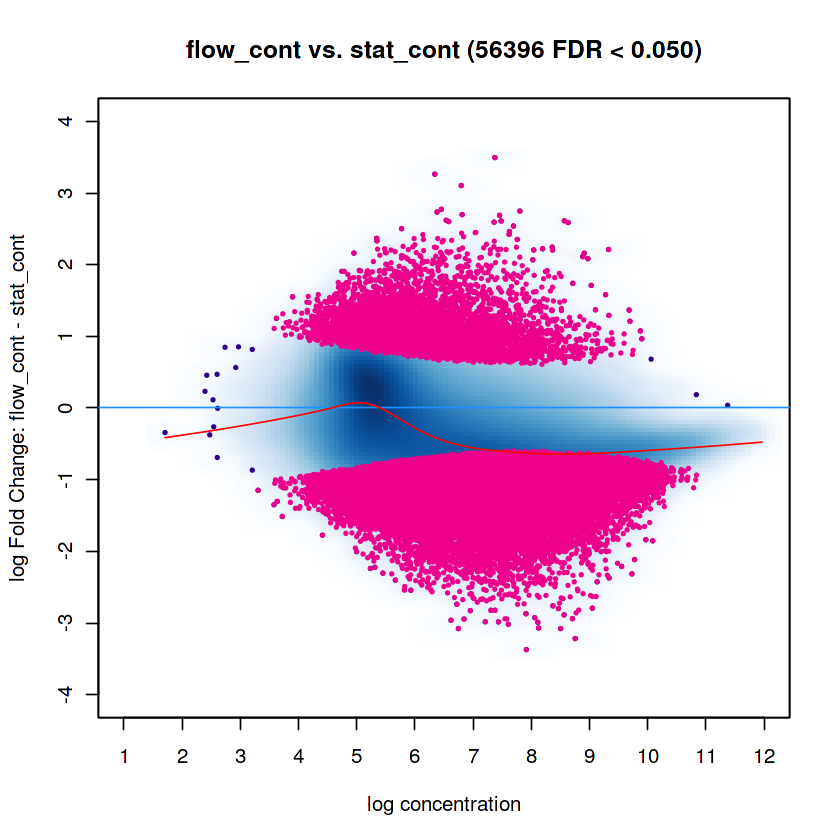

In [25]:
dba.plotMA(flow,contrast = 2)

In [26]:
dba.show(flow, bContrasts = 1)

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,flow_cont,2,flow_bmp9,2,1
2,Condition,flow_cont,2,stat_cont,2,56396
3,Condition,flow_cont,2,stat_bmp9,2,126468
4,Condition,flow_bmp9,2,stat_cont,2,38186
5,Condition,flow_bmp9,2,stat_bmp9,2,101682
6,Condition,stat_bmp9,2,stat_cont,2,29705


#### retrieve the differentially bound sites

In [27]:
flow.DB.flowCont_vs_statCont <- dba.report(flow, contrast = 2)

In [28]:
flow.DB.flowCont_vs_statCont

GRanges object with 56396 ranges and 6 metadata columns:
         seqnames              ranges strand |      Conc Conc_flow_cont
            <Rle>           <IRanges>  <Rle> | <numeric>      <numeric>
  131761     chr3   30518318-30518718      * |   8.75461        5.87331
   10075     chr1   99602384-99602784      * |   7.91489        4.79109
   66500    chr15   34279328-34279728      * |   7.37503        8.30424
   66928    chr15   39596653-39597053      * |   8.70841        6.23288
   56967    chr13   79767051-79767451      * |   8.12639        5.36310
     ...      ...                 ...    ... .       ...            ...
  168317     chr5 178585495-178585895      * |   6.72732        7.05672
   34133    chr11   30712833-30713233      * |   5.30531        4.64664
  191357     chr7 131107948-131108348      * |   8.43678        7.91780
  214855     chrX   37745368-37745768      * |   7.17592        6.62890
   99311     chr2     3827627-3828027      * |   6.80484        6.22146
       

In [29]:
flow.DB.flowCont_vs_statContdf = data.frame(flow.DB.flowCont_vs_statCont)

In [30]:
colnames(flow.DB.flowCont_vs_statContdf)

[1] "seqnames"       "start"          "end"            "width"         
 [5] "strand"         "Conc"           "Conc_flow_cont" "Conc_stat_cont"
 [9] "Fold"           "p.value"        "FDR"

write.table( x = data.frame(flow.DB.flowCont_vs_statContdf), file = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/flowCont_vs_flowBmp9.csv", sep=",", col.names=TRUE, row.names=FALSE, quote=FALSE )

In [31]:
contrast_matrix = dba.show(flow, bContrasts = TRUE)
contrast_matrix

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,flow_cont,2,flow_bmp9,2,1
2,Condition,flow_cont,2,stat_cont,2,56396
3,Condition,flow_cont,2,stat_bmp9,2,126468
4,Condition,flow_bmp9,2,stat_cont,2,38186
5,Condition,flow_bmp9,2,stat_bmp9,2,101682
6,Condition,stat_bmp9,2,stat_cont,2,29705


#### below function exports the results of each comparison to a csv table

In [112]:
granges_to_csv <- function(granges_obj, contrast){
    report <- dba.report(granges_obj, contrast = contrast)
    report_df <- as.data.frame(report)
    region= paste(report_df$seqnames,report_df$start,sep=":")
    region=paste(region,report_df$end,sep="-")
    report_df["region"]=region
    save_name = paste( gsub("-", "_", contrast_matrix[contrast,2], fixed = TRUE) , "_VS_" ,gsub("-", "_", contrast_matrix[contrast,4], fixed = TRUE), ".csv",sep="")
    save_path_full = paste("/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/",save_name,sep="")
    write.table( x = report_df, file = save_path_full, sep=",", col.names=TRUE, row.names=FALSE, quote=FALSE )
}

In [121]:
for (i in seq(1, NROW(contrast_matrix))){
    granges_to_csv(flow, i)
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6


#### below function converts the results of each comparison to a a bed-formatted file

In [186]:
granges_to_bed <- function(granges_obj, contrast){
    report <- dba.report(granges_obj, contrast = contrast)
    bed_df <- data.frame(seqnames=seqnames(report),
    starts=start(report)-1,
    ends=end(report),
    strands=strand(report),
    fold_change=report$Fold,
    p_value=report$`p-value`,
    FDR=report$FDR,
    mean_read_concentration=mcols(report)[1],
    read_concentration_condition1=mcols(report)[2],
    read_concentration_condition2=mcols(report)[3])
    save_name = paste( gsub("-", "_", contrast_matrix[contrast,2], fixed = TRUE) , "_VS_" ,gsub("-", "_", contrast_matrix[contrast,4], fixed = TRUE), ".bed",sep="")
    save_path_full = paste("/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/bedFiles/",save_name,sep="")
    write.table(bed_df, file=save_path_full, quote=F, sep="\t", row.names=F, col.names=F)

    
}

In [187]:
for (i in seq(1, NROW(contrast_matrix))){
    granges_to_bed(flow, i)
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6


### save the workspace

In [32]:
save.image("/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/DiffAcc_WS_22March23.RData")